[logistic.py](logistic.py) file.

In [11]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer

import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Abstract

This blog post explores the implementation and performance of logistic regression using gradient descent optimization. The focus is on training a logistic regression model for a binary classification task and analyzing its behavior with different configurations, such as using or not using momentum in the gradient descent process. The experiments include training models on both synthetic and real-world datasets, including a dataset derived from the CDC's Behavioral Risk Factor Surveillance System (BRFSS), focused on predicting heart disease. The study evaluates various aspects of logistic regression, such as the effect of momentum on convergence speed, the occurrence of overfitting, and the ability of the model to generalize to unseen data. The post also provides visualizations, such as decision boundary plots, and detailed comparisons of training and validation performance. The aim is to provide a comprehensive understanding of logistic regression and gradient descent in machine learning.

# Part B

## Experimental Data
Code ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍to ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍generate ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍data ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍for ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍classification ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍problem. ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍You ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍can ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍control ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍number ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍points ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍by ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍adjusting ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍n_points, ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍number ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍features ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍by ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍adjusting ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍p_dims, ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍and ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍difficulty ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍classification ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍problem ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍by ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍adjusting ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍noise ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍(higher ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍noise ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍is ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍a ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍harder ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍problem).

In [12]:
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

# Vanilla ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍gradient ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍descent: ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍

The following code initializes a logistic regression model and a gradient descent optimizer to train the model on classification data. We call classification_data to create our tensor data set according to the requirement of p_dims = 2.

It defines a function, that we use mutliple time in this blog post, train_and_get_loss that performs gradient descent for a specified number of iterations (default 500), updating the model’s weights using a learning rate (alpha) and a momentum factor (beta).  In each iteration, the function computes the logistic loss using LR.loss(X, y) and stores the loss in a list (loss_vec). It then updates the model's weights via the optimizer (opt.step(X, y, alpha, beta)). Finally, it function returns a list of loss values at each iteration. 

We call the above function with a learning rate of 0.1 and no momentum to obeserve vanilla gradient descent. The resulting loss_vec is then used at a later time.

In [13]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

X, y = classification_data()

def train_and_get_loss(alpha, beta, iterations=500, LR=LR, opt=opt, X=X, y=y):
    loss_vec = []
    
    for i in range(iterations):
        loss = LR.loss(X, y)
        loss_vec.append(loss)
        opt.step(X, y, alpha=alpha, beta=beta)
    
    return loss_vec

loss_vec = train_and_get_loss(alpha=0.1, beta=0)
    

The code below defines a function decision_boundary that visualizes the decision boundary of a given model on a 2D dataset. It starts by determining the minimum and maximum values of the two features in X to create a grid that covers the feature space, using np.meshgrid to generate a 2D grid of points. This grid is flattened, augmented with a column of ones for the bias term, and converted to a PyTorch tensor. The model’s predictions for each grid point are then calculated using the model.score() method and the sigmoid function, classifying the points. The predictions are reshaped to match the grid, and a contour plot (plt.contourf) is used to display the decision boundary, while the actual data points are plotted using plt.scatter, with their colors corresponding to the target labels in y. The function is called with the logistic regression model and the dataset (X, y), and the resulting plot shows the decision boundary along with the data points.

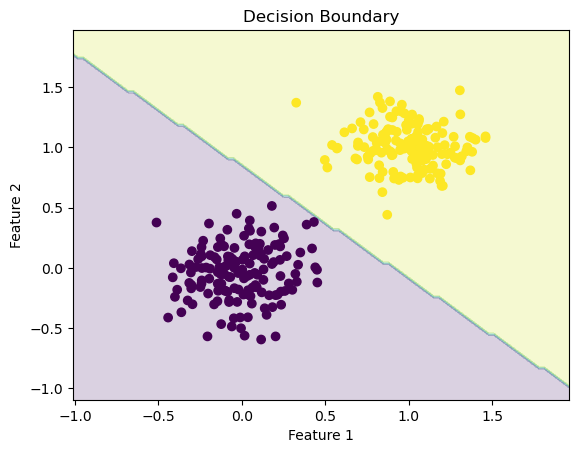

In [14]:
def decision_boundary(model, X, y):
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx1, xx2 = np.meshgrid(np.linspace(x_min, x_max, 100),
                           np.linspace(y_min, y_max, 100))

    grid = np.c_[xx1.ravel(), xx2.ravel()]
    grid = np.concatenate([grid, np.ones((grid.shape[0], 1))], axis=1)
    grid_tensor = torch.tensor(grid, dtype=torch.float32)

    pred = (torch.sigmoid(model.score(grid_tensor)) >= 0.5).float()
    pred = pred.reshape(xx1.shape)

    plt.contourf(xx1, xx2, pred, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

decision_boundary(LR, X.numpy(), y.numpy())

We observe a contour plot with a smooth decision boundary separating two regions. The contour plot represents the model's predicted classifications for the first two features, with regions colored to indicate the predicted class (class 0 or class 1). The decision boundary line clearly indicates the transition between the two classes. The model has achieved good accuracy as we see the points of each class distinctly grouped on their respective sides of the decision boundary, with no overlap. The boundary itself creates a separation between the two classes in the feature space, showing how well the model has learned to classify the data.

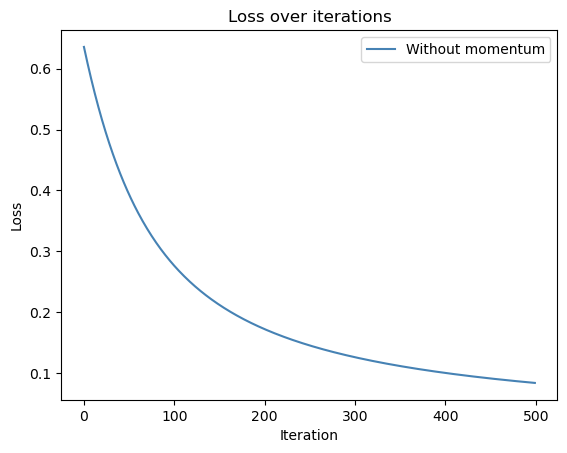

In [15]:
plt.plot(loss_vec, c="steelblue", label="Without momentum")
plt.title('Loss over iterations')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

The above code plots the loss_vec from calling the train_and_get_loss. As expected we observe that the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍loss ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍decreases ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍monotonically‍. The model starts with a loss of 0.62 and gradually decreases after each iteration until it reaches less than 0.1 around iteration 500. 

# Gradient ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍descent ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍with ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍momentum

We create another LR model, this time using a beta value of 0.9 for higher momentum. We then plot our decision regions after training the model and observe a similar result to what we saw above with the lower momentum. The only difference here seems to be that the decision boundary line is slightly further away from our purple scatter points, indicating a more even distribution of the decision boundary, with potentially less sensitivity to small changes in the data. This suggests that the higher momentum has helped the model converge faster, potentially avoiding local minima and smoothing out the boundary.

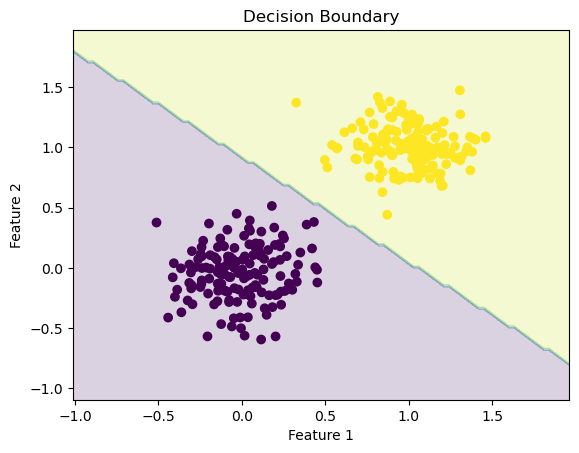

In [16]:
LR_momentum = LogisticRegression() 
opt_momentum = GradientDescentOptimizer(LR_momentum)

loss_momentum = train_and_get_loss(alpha=0.1 , beta=0.9, LR=LR_momentum, opt=opt_momentum)

decision_boundary(LR_momentum, X.numpy(), y.numpy())

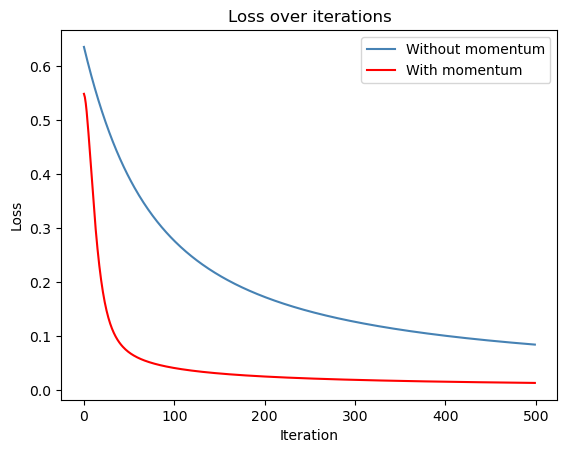

In [17]:
plt.plot(loss_vec, c="steelblue", label="Without momentum")
plt.plot(loss_momentum, c='red', label="With momentum")
plt.title('Loss over iterations')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

After running the code, we observe a plot comparing the loss values over iterations for two different gradient descent runs: one without momentum and one with momentum. The loss curve without momentum (in blue) shows slower and more erratic convergence, with fluctuations throughout the iterations. In contrast, the curve with momentum (in red) exhibits a sharp drop in loss around iteration 50, followed by a slight, steady decrease until iteration 500. This indicates that momentum accelerates the convergence process, helping the model reach a lower loss faster and more reliably. The comparison highlights how momentum can enhance gradient descent by helping us reach better accuracy quuicker, improving the model’s training efficiency.

# Overfitting

In this code, we generate synthetic data with 50 features and 30 data points for both the training and test sets, which results in a higher number of features than data points, potentially leading to overfitting. We then initialize a logistic regression model and a gradient descent optimizer, and train the model using the while loop until the training accuracy reaches 100% or the maximum number of iterations is reached. During training, the model's predictions are compared with the true labels for the training set to calculate accuracy, and the optimizer updates the model’s parameters accordingly. 

In [18]:
X_train, y_train = classification_data(n_points=30, p_dims=50)
X_test, y_test = classification_data(n_points=30, p_dims=50)

LR_overfit = LogisticRegression() 
opt_overfit = GradientDescentOptimizer(LR_overfit)

train_accuracy = 0
max_iterations = 1000
iteration = 1

while train_accuracy < 1.0 and iteration < max_iterations:
    opt_overfit.step(X_train, y_train)
    
    train_predictions = LR_overfit.predict(X_train)
    current_accuracy = torch.mean((train_predictions == y_train).float())
    train_accuracy = current_accuracy

print(f"Final Training Accuracy: {train_accuracy * 100:.2f}%")

test_predictions = LR_overfit.predict(X_test)
test_accuracy = torch.mean((test_predictions == y_test).float())
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Final Training Accuracy: 100.00%
Test Accuracy: 93.33%


The output for Final Training Accuracy shows 100% accuracy on the training data. However, when the model is evaluated on the test data, the accuracy drops to 93.33%. This observation suggests that while the model has perfectly fit the training data (indicative of overfitting), it doesn't generalize as well to unseen data, which is a result we would typically expect to observe in situations where the number of features exceeds the number of training points.

# Emperical Data performance

The dataset used in this analysis is derived from the CDC's Behavioral Risk Factor Surveillance System (BRFSS), a comprehensive survey program that gathers data on the health status of U.S. residents. This dataset @pytlak2022heart, which is a part of the 2022 BRFSS annual survey, includes information from over 400,000 adult participants. The focus is on key health indicators related to heart disease, including risk factors such as high blood pressure, high cholesterol, smoking, diabetes status, obesity (high BMI), physical activity levels, and alcohol consumption. These factors are critical in understanding and predicting the likelihood of heart disease, a leading cause of death in the U.S. The dataset has been reduced from nearly 300 variables to 40 key features chosen by the dataset creator, that directly influence heart disease. One of the binary target variables in the dataset, “HadHeartAttack,” classifies respondents as either having or not having heart disease, which is used for building machine learning classification models like logistic regression, SVM, or random forests. The dataset is particularly useful for examining patterns and factors that contribute to heart disease, although it should be noted that the classes are unbalanced, meaning that strategies like weight adjustment or undersampling might be necessary to improve model performance.

We first preprocess the downloaded dataset (heart_diseases.csv). First, the dataset is loaded and any rows with missing values are removed. Then, the target variable HeartDisease is mapped to a binary format, where 'Yes' is converted to 1 and 'No' to 0. The feature matrix X_initial is created by dropping the target column, and the target variable y is set to the HeartDisease column. The code further identifies numerical and categorical columns in the dataset using select_dtypes(). For preprocessing, a ColumnTransformer is applied, which scales numerical features using StandardScaler() and applies one-hot encoding to categorical features (with the first category dropped to avoid multicollinearity). The transformed features are then converted into a NumPy array and subsequently into a PyTorch tensor (X_tensor) to make it compatible with our custom Logistic regression model. 

In [19]:
df = pd.read_csv('heart_diseases.csv')
df.dropna(inplace=True)
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

X_initial = df.drop(columns=["HeartDisease"])
y = df["HeartDisease"]

numerical_cols = X_initial.select_dtypes(include=['number']).columns
categorical_cols = X_initial.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

X_transformed = preprocessor.fit_transform(X_initial).toarray()
X_tensor = torch.tensor(X_transformed, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

After preprocessing and converting to tensor, the data is split into training, validation, and test sets using train_test_split from scikit-learn. The split follows the specified ratios: 60% for training, while the remaining 40% is divided evenly into validation and test sets (20% each). 

Next, two logistic regression models are trained on the training set, each with different configurations. The first model, LR_emperical_train, is trained using vanilla gradient descent without momentum (i.e., beta=0). The second model, LR_emperical_momentum_train, uses gradient descent with a momentum factor of 0.9 (i.e., beta=0.9). For both models, the train_and_get_loss function is called to perform gradient descent over 500 iterations, where the loss at each iteration is computed and stored in loss_emp_train and loss_emp_momentum_train for later analysis. We rpeat the same process for validation set too.

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, train_size=0.6, test_size=0.4, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_tensor, y_tensor, train_size=0.5, test_size=0.5, random_state=123)

LR_emperical_train = LogisticRegression()
opt_emperical_train = GradientDescentOptimizer(LR_emperical_train)
loss_emp_train = train_and_get_loss(alpha=0.1, beta=0, LR=LR_emperical_train, opt=opt_emperical_train, X=X_train, y=y_train)

LR_emperical_momentum_train = LogisticRegression()
opt_emperical_momentum_train = GradientDescentOptimizer(LR_emperical_momentum_train)
loss_emp_momentum_train = train_and_get_loss(alpha=0.1, beta=0.9, LR=LR_emperical_momentum_train, opt=opt_emperical_momentum_train,X=X_train, y=y_train)

LR_emperical_val = LogisticRegression()
opt_emperical_val = GradientDescentOptimizer(LR_emperical_val)
loss_emp_val = train_and_get_loss(alpha=0.1, beta=0, LR=LR_emperical_val, opt=opt_emperical_val, X=X_val, y=y_val)

LR_emperical_momentum_val = LogisticRegression()
opt_emperical_momentum_val = GradientDescentOptimizer(LR_emperical_momentum_val)
loss_emp_momentum_val = train_and_get_loss(alpha=0.1, beta=0.9, LR=LR_emperical_momentum_val, opt=opt_emperical_momentum_val,X=X_val, y=y_val)

The plt.plot() function is used to plot all 4 loss values over iterations, with appropriate labels to distinguish between the different configurations. The plt.legend() function ensures that a legend is displayed, indicating which curve corresponds to each configuration. The x-axis represents the iteration number, while the y-axis represents the loss at each iteration.

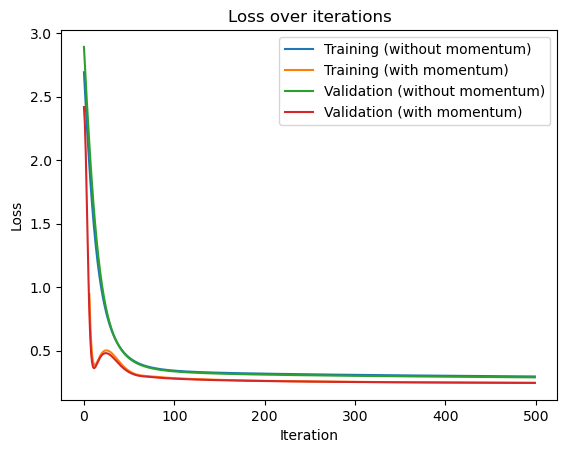

In [22]:
plt.plot(loss_emp_train, label="Training (without momentum)")
plt.plot(loss_emp_momentum_train, label="Training (with momentum)")
plt.plot(loss_emp_val, label="Validation (without momentum)")
plt.plot(loss_emp_momentum_val, label="Validation (with momentum)")
plt.title('Loss over iterations')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

After running the code, we observe the loss curves for both training and validation datasets over 500 iterations, comparing the impact of momentum. The curves with momentum (orange and red) show a slightly faster convergence and lower final loss values compared to the curves without momentum (blue and green). The training and validation losses decrease quickly in the first few iterations and then plateau as the iterations increase. The is also a local peak at about iteration 50 for both training and validation loss with momentum

The gap between the training and validation loss is minimal, indicating that the model is not overfitting, even as momentum accelerates convergence. Overall, the results demonstrate that using momentum in gradient descent improves optimization performance, leading to quicker convergence and better generalization to the validation data. This shows the advantages of momentum over standard gradient descent in reducing loss and improving model efficiency.

In [23]:
test_loss = LR_emperical_train.loss(X_test, y_test)
test_predictions = LR_emperical_train.predict(X_test)
test_accuracy = torch.mean((test_predictions == y_test).float())

print(f"Test Loss: {test_loss.item():.4f}")
print(f"Test Accuracy: {test_accuracy.item() * 100:.2f}%")

Test Loss: 0.3021
Test Accuracy: 90.31%


In this code, we evaluate the performance of the trained logistic regression model on the test dataset. First, the test loss is calculated using the loss() function, which computes the logistic loss between the model’s predictions and the true labels (y_test). Next, the model's predictions on the test data are made using the predict() function, and the test accuracy is calculated by comparing the predicted labels to the true labels. The accuracy is computed as the mean of correct predictions. The output displays a test loss of 0.3021, indicating the model's error in predicting the test data, and a test accuracy of 90.31%, demonstrating that the model performs well on unseen data, with a high rate of correct predictions.

# Discussion

In this post, we implemented logistic regression using custom gradient descent optimizers, investigating the effect of momentum on convergence and generalization. We performed experiments using synthetic datasets to visualize decision boundaries and observe how the model's accuracy improved with or without momentum. The comparison of loss curves revealed that momentum accelerates convergence, reducing the loss more quickly and leading to more stable optimization. Additionally, we observed the phenomenon of overfitting when the number of features exceeded the number of data points, demonstrating the challenges of model generalization. Lastly, the empirical dataset on heart disease highlighted the practical applications of logistic regression in real-world healthcare data, emphasizing the importance of preprocessing and model evaluation strategies. Through these experiments, we gained valuable insights into how momentum impacts training efficiency and accuracy and how logistic regression can be applied to complex classification tasks.

## References